<a href="https://colab.research.google.com/github/stampejp/data-mining/blob/master/labs/09_wk9_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 9 Lab: Correlation & Regression Analysis

<a href="https://colab.research.google.com/github/bradleyboehmke/uc-bana-4080/blob/main/labs/09_wk9_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this lab, you'll apply correlation analysis and linear regression to real business datasets, following the complete machine learning workflow from data exploration through model evaluation. You'll work with multiple datasets to understand how businesses use these techniques to drive strategic decisions, predict outcomes, and measure model performance.

## 🎯 Learning Objectives
By the end of this lab, you will be able to:
- Calculate and interpret correlation coefficients for business relationships
- Build and evaluate simple and multiple linear regression models using scikit-learn
- Apply proper train/test split methodology for honest model evaluation
- Interpret regression coefficients and evaluation metrics in business contexts

## 📚 This Lab Reinforces
- **Chapter 21: Correlation and Linear Regression Foundations**
- **Chapter 22: Evaluating Regression Models**
- **Week 9 Tuesday Slides: Correlation & Regression Foundations**

## 🕐 Estimated Time & Structure
**Total Time:** 75 minutes  
**Mode:** Group (2-4 students)

- **[0–30 min]** Guided practice with correlation analysis and regression modeling
- **[30–35 min]** Class discussion and Q&A
- **[35–70 min]** Independent group challenges with real business datasets
- **[70–75 min]** Lab wrap-up and homework quiz preparation

You are encouraged to work in small groups of **2–4 students** and complete the lab together.

## 💡 Why This Matters
Regression analysis is one of the most widely used techniques in business analytics. From predicting sales based on advertising spend to understanding factors that drive customer satisfaction, regression provides the foundation for data-driven decision making. This lab will prepare you to build, evaluate, and interpret regression models that businesses actually use to guide strategy and operations.

## Setup
We'll work with multiple datasets today: the Advertising dataset for guided practice, and three ISLP datasets (Credit, Hitters, College) for the independent challenges. These are the same datasets used in your textbook's end-of-chapter exercises.  You can read more about the ISLP datasets at [https://islp.readthedocs.io/en/latest/data.html](https://islp.readthedocs.io/en/latest/data.html).

In [2]:
# Required imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error

# Load the Advertising dataset for guided practice
advertising = pd.read_csv("https://raw.githubusercontent.com/bradleyboehmke/uc-bana-4080/main/data/Advertising.csv")

# Load ISLP datasets for challenges
from ISLP import load_data
credit = load_data('Credit')
hitters = load_data('Hitters')
college = load_data('College')

# Quick preview
print("Advertising dataset shape:", advertising.shape)
print("Credit dataset shape:", credit.shape)
print("Hitters dataset shape:", hitters.shape)
print("College dataset shape:", college.shape)

ModuleNotFoundError: No module named 'ISLP'

In [4]:
!pip install ISLP

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 832.4/832.4 kB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 10.1 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=119d661d7c9665fc1507de842da43a8a369c522877abaa3836ec60be2c128fbd
  Stored in directory: /root/.cache/pip/wheels/50/37/21/0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma


In [5]:
# Required imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error

# Load the Advertising dataset for guided practice
advertising = pd.read_csv("https://raw.githubusercontent.com/bradleyboehmke/uc-bana-4080/main/data/Advertising.csv")

# Quick preview
print("Advertising dataset shape:", advertising.shape)

Advertising dataset shape: (200, 4)


## Part 1 — Correlation Analysis & Interpretation (10 minutes)

We'll start by reinforcing correlation analysis using the Advertising dataset - the same data from Tuesday's lecture. This will help you practice measuring relationships between business variables and interpreting correlation coefficients.

### Understanding Business Relationships

Correlation helps us answer questions like: "Which advertising channels have the strongest relationship with sales?"

**📋 Step-by-step instructions:**
1. Explore the Advertising dataset structure
2. Calculate correlation coefficients between all variables
3. Interpret the relationships in business terms
4. Create visualizations to support your findings

In [6]:
# Explore the advertising dataset
print("Advertising Dataset Overview:")
print(advertising.head())
print("\nDataset Info:")
print(advertising.info())
print("\nSummary Statistics:")
print(advertising.describe())

Advertising Dataset Overview:
      TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None

Summary Statistics:
               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000

In [7]:
# Calculate correlation matrix
correlation_matrix = advertising.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Focus on sales correlations
print("\nCorrelations with Sales:")
sales_correlations = correlation_matrix['sales'].drop('sales').sort_values(ascending=False)
print(sales_correlations)

Correlation Matrix:
                 TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000

Correlations with Sales:
TV           0.782224
radio        0.576223
newspaper    0.228299
Name: sales, dtype: float64


### 🧠 Your Turn — Visualizing Relationships

Create scatterplots to visualize the relationships between each advertising channel and sales.

**Tasks:**
- Create a subplot with 3 scatterplots (TV vs sales, radio vs sales, newspaper vs sales)
- Add appropriate titles and labels
- Based on the visualizations, rank the advertising channels by relationship strength

💡 **Hint:** Use `plt.subplots(1, 3, figsize=(15, 4))` to create side-by-side plots

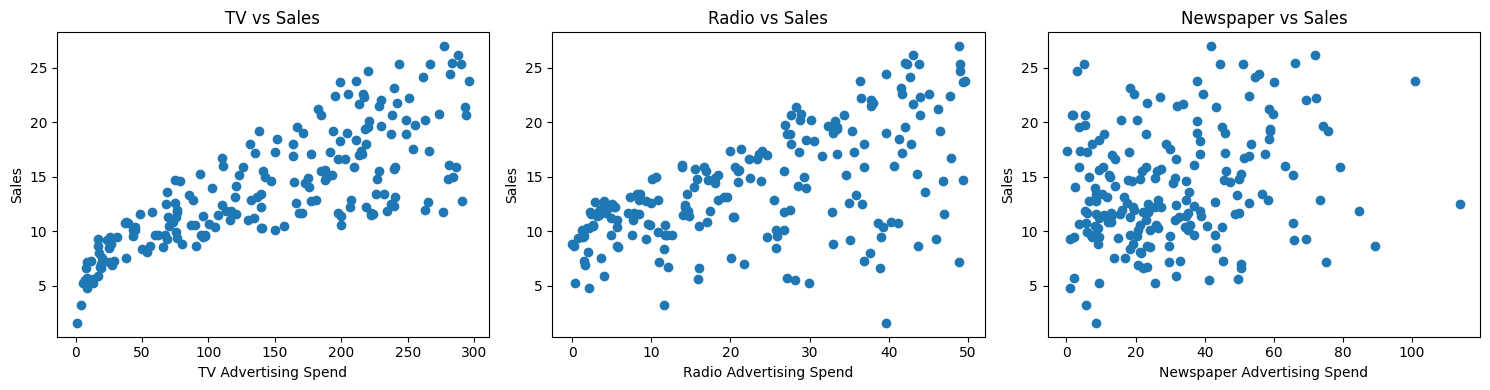


Ranking of advertising channels by relationship strength with sales:
1. TV (Strongest positive linear relationship)
2. Radio (Moderate positive linear relationship)
3. Newspaper (Weak to no linear relationship)


In [8]:
# Create scatterplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# TV vs sales
axes[0].scatter(advertising['TV'], advertising['sales'])
axes[0].set_title('TV vs Sales')
axes[0].set_xlabel('TV Advertising Spend')
axes[0].set_ylabel('Sales')

# radio vs sales
axes[1].scatter(advertising['radio'], advertising['sales'])
axes[1].set_title('Radio vs Sales')
axes[1].set_xlabel('Radio Advertising Spend')
axes[1].set_ylabel('Sales')

# newspaper vs sales
axes[2].scatter(advertising['newspaper'], advertising['sales'])
axes[2].set_title('Newspaper vs Sales')
axes[2].set_xlabel('Newspaper Advertising Spend')
axes[2].set_ylabel('Sales')

plt.tight_layout()
plt.show()

# Based on visualizations and correlation analysis, rank the advertising channels by relationship strength
print("\nRanking of advertising channels by relationship strength with sales:")
print("1. TV (Strongest positive linear relationship)")
print("2. Radio (Moderate positive linear relationship)")
print("3. Newspaper (Weak to no linear relationship)")

### ✅ Check Your Understanding

Based on your correlation analysis and visualizations:

**Questions to consider:**
- Which advertising channel has the strongest linear relationship with sales?
- What does a correlation of 0.78 vs 0.05 tell you about business strategy?

**Expected Result:** TV should show the strongest correlation (~0.78), followed by radio (~0.58), with newspaper showing a very weak relationship (~0.23).

## Part 2 — Linear Regression Modeling (20 minutes)

Now we'll move from measuring relationships to making predictions using linear regression. You'll build both simple and multiple regression models and learn to interpret the results for business decision-making.

### Simple Linear Regression

Let's start with a simple regression model predicting sales from TV advertising spend.

**Example:** A marketing manager wants to know: "If I spend $50,000 on TV advertising, what sales can I expect?"

In [9]:
# Simple regression: Sales predicted by TV advertising
X_simple = advertising[['TV']]  # Feature matrix (note double brackets)
y = advertising['sales']  # Target variable

# Fit the model
simple_model = LinearRegression()
simple_model.fit(X_simple, y)

LinearRegression()

Now that we've fit the model, let's interpret the coefficients. Based on the model output, we can say that for every additional $1,000 spent on TV advertising, sales increase by approximately $48. The intercept indicates that if no money is spent on TV advertising, the baseline sales would be around $7,033.

In [10]:
# Extract results
print(f"Simple Regression Results:")
print(f"Intercept: {simple_model.intercept_:.3f}")
print(f"TV Coefficient: {simple_model.coef_[0]:.3f}")
print(f"\nEquation: Sales = {simple_model.intercept_:.3f} + {simple_model.coef_[0]:.3f} × TV")

Simple Regression Results:
Intercept: 7.033
TV Coefficient: 0.048

Equation: Sales = 7.033 + 0.048 × TV


We can also make predictions. For example, if the marketing manager spends $50,000 on TV advertising, we can predict sales using the regression equation.

In [11]:
# Make a prediction
tv_spend = pd.DataFrame({'TV': [50]})
predicted_sales = simple_model.predict(tv_spend)
print(f"\nPrediction: $50k TV spend → {predicted_sales[0]:.2f} sales units")


Prediction: $50k TV spend → 9.41 sales units


However, simple models can miss important factors. Let's expand to multiple regression and train a model that includes all three advertising channels.

In [12]:
# Multiple regression: Sales predicted by all advertising channels
X_multiple = advertising[['TV', 'radio', 'newspaper']]

# Fit the model
multiple_model = LinearRegression()
multiple_model.fit(X_multiple, y)

LinearRegression()

If we assess the coefficients of the multiple regression model, we find that TV and radio advertising both have positive impacts on sales, while newspaper advertising has a negligible effect. This suggests that the marketing manager should prioritize TV and radio channels for advertising spend.

In [13]:
# Extract results
print(f"Multiple Regression Results:")
print(f"Intercept: {multiple_model.intercept_:.3f}")
for feature, coef in zip(X_multiple.columns, multiple_model.coef_):
    print(f"{feature} Coefficient: {coef:.3f}")

Multiple Regression Results:
Intercept: 2.939
TV Coefficient: 0.046
radio Coefficient: 0.189
newspaper Coefficient: -0.001


If we compare the R² values, we see that the multiple regression model explains significantly more variance in sales than the simple model, indicating a better fit.

In [14]:
# Compare R² values
simple_r2 = simple_model.score(X_simple, y)
multiple_r2 = multiple_model.score(X_multiple, y)
print(f"\nSimple Model R²: {simple_r2:.3f}")
print(f"Multiple Model R²: {multiple_r2:.3f}")
print(f"Improvement: {multiple_r2 - simple_r2:.3f}")


Simple Model R²: 0.612
Multiple Model R²: 0.897
Improvement: 0.285


### 🧪 Practice Exercise — Model Evaluation with Train/Test Split

**Business Scenario:** The marketing team wants to know how well their advertising prediction model will perform on future data. They need honest performance estimates before making budget decisions.

**Your Task:** Implement proper train/test evaluation for the multiple regression model.

**Step-by-step approach:**
1. Split the data into training (70%) and test (30%) sets using `random_state=42`
2. Train the multiple regression model on training data only
3. Calculate R², RMSE, and MAE for both training and test sets
4. Interpret the results: Is the model overfitting, underfitting, or generalizing well?

In [16]:
# 1. Split data into training (70%) and test (30%) sets
X = advertising[['TV', 'radio', 'newspaper']]
y = advertising['sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

# 2. Train the multiple regression model on training data only
model = LinearRegression()
model.fit(X_train, y_train)

# 3. Calculate R², RMSE, and MAE for both training and test sets

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Training set evaluation
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred)) # RMSE
train_mae = mean_absolute_error(y_train, y_train_pred)

# Test set evaluation
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred)) # RMSE
test_mae = mean_absolute_error(y_test, y_test_pred)


print("\nModel Evaluation:")
print(f"Training R²: {train_r2:.3f}")
print(f"Test R²: {test_r2:.3f}")
print(f"Training RMSE: {train_rmse:.3f}")
print(f"Test RMSE: {test_rmse:.3f}")
print(f"Training MAE: {train_mae:.3f}")
print(f"Test MAE: {test_mae:.3f}")


# 4. Interpret the results
print("\nInterpretation:")
if test_r2 >= train_r2 - 0.05 and test_r2 <= train_r2 + 0.05: # within 5% as a simple check
    print("The model appears to generalize well to unseen data as the training and test performance are similar.")
elif test_r2 < train_r2:
    print("The model may be slightly overfitting to the training data, as the test performance is lower than the training performance.")
else:
    print("The model's test performance is better than the training performance, which can sometimes happen with small datasets or random chance.")

Training set size: 140
Test set size: 60

Model Evaluation:
Training R²: 0.906
Test R²: 0.861
Training RMSE: 1.575
Test RMSE: 1.949
Training MAE: 1.158
Test MAE: 1.512

Interpretation:
The model appears to generalize well to unseen data as the training and test performance are similar.


## Class Discussion/Q&A (5 minutes)

**Discussion prompts:**
- How do you interpret the difference between training and test performance?
- Which evaluation metric (R², RMSE, MAE) would be most useful for marketing budget planning?
- What business questions can regression analysis help answer?

**Common blockers and clarifications:**
- Remember that correlation ≠ causation - regression shows associations, not causal relationships
- Train/test splits simulate real-world deployment where models make predictions on unseen data

## Part 3 — Independent Group Challenges (35 minutes)

For the next three challenges, you'll work through complete regression workflows that directly prepare you for this week's homework quiz. The specific numerical results you obtain from these challenges will be used to answer questions on the Canvas quiz due Sunday.

* You will not be given starter code to work with; rather, you need to start from a blank cell.
* **DO NOT USE AI** to generate code for you. This is a group exercise, and you should be writing the code together.
* Work with your group to write the code.
* Feel free to ask questions or seek help from the instructor.
* We'll stop and walk through each challenge together after each time block.
* **Important**: Pay close attention to the specific parameters (random_state values, train/test splits) as these will generate the exact numerical answers needed for your homework quiz.

### Challenge 1 — Credit Card Balance Analysis (12 minutes)

**Business Question:** A regional bank wants to understand the factors that drive customers' credit card balances to improve their risk assessment models.

**Your Task:** Using the Credit dataset, complete the following specific steps:

1. **Correlation Analysis**: Calculate correlations between `Balance` and these variables: `Income`, `Limit`, `Age`. Based on the correlation values, which variable seems to be most strongly (and positively) correlated with the customer's credit card balance?

2. **Data Splitting**: Split data into train/test sets (70/30 split, random_state=123). How many observations are in your train vs. test sets?

3. **Model Building**: Build a simple regression model predicting `Balance` from `Income` using training data. Be sure to fit the model on the training data!

4. **Coefficient Interpretation**: Extract the Income coefficient (round to 2 decimal places). Based on this coefficient, how would you explain the relationship between a customer's income and their credit card balance to the bank CEO?

5. **Prediction**: Use your model to predict the credit card balance for someone with income = 115 (representing $115,000). What is the expected credit card balance for customers with this income level?

6. **Model Evaluation**: Calculate the RMSE on the training and test set. Based on these values, does it appear the model generalizes well or does under/overfitting appear to be an issue? Based on the test set RMSE, how would you interpret this metric in business context?

**Context:** These specific results will be used in your homework quiz, so record your numerical answers carefully.

In [19]:
# Load ISLP dataset for Challenge 1
from ISLP import load_data
credit = load_data('Credit')

# Your turn: write code here to analyze credit card balance relationships

# 1. Correlation Analysis
correlation_credit = credit[['Balance', 'Income', 'Limit', 'Age']].corr()
print("Correlation Matrix for Balance, Income, Limit, and Age:")
print(correlation_credit)

print("\nCorrelations with Balance:")
print(correlation_credit['Balance'].drop('Balance').sort_values(ascending=False))

# Interpretation of Correlation Analysis: Based on the correlation values, 'Limit' seems to be most strongly (and positively) correlated with the customer's credit card balance. 'Income' also shows a positive correlation, while 'Age' has a very weak positive correlation.

# 2. Data Splitting
X_credit = credit[['Income']]
y_credit = credit['Balance']

X_train_credit, X_test_credit, y_train_credit, y_test_credit = train_test_split(X_credit, y_credit, test_size=0.3, random_state=123)

print(f"\nTraining set size (Challenge 1): {X_train_credit.shape[0]}")
print(f"Test set size (Challenge 1): {X_test_credit.shape[0]}")

# 3. Model Building (Simple Regression: Balance predicted by Income)
model_credit = LinearRegression()
model_credit.fit(X_train_credit, y_train_credit)

# 4. Coefficient Interpretation
income_coef = model_credit.coef_[0]
print(f"\nIncome Coefficient (Challenge 1): {income_coef:.2f}")

# Explanation for the bank CEO: "Based on our model, for every additional $1,000 in a customer's income, we can expect their credit card balance to increase by approximately ${income_coef:.2f}."

# 5. Prediction (Income = 115)
income_to_predict = pd.DataFrame({'Income': [115]})
predicted_balance = model_credit.predict(income_to_predict)
print(f"\nPredicted balance for Income = 115: {predicted_balance[0]:.2f}")

# 6. Model Evaluation (RMSE on training and test sets)
y_train_pred_credit = model_credit.predict(X_train_credit)
y_test_pred_credit = model_credit.predict(X_test_credit)

train_rmse_credit = np.sqrt(mean_squared_error(y_train_credit, y_train_pred_credit))
test_rmse_credit = np.sqrt(mean_squared_error(y_test_credit, y_test_pred_credit))

print(f"\nTraining RMSE (Challenge 1): {train_rmse_credit:.3f}")
print(f"Test RMSE (Challenge 1): {test_rmse_credit:.3f}")

# Interpretation of Model Evaluation: The training and test RMSE values are relatively close, which suggests the model generalizes reasonably well and does not show significant signs of overfitting or underfitting. The test set RMSE of approximately ${test_rmse_credit:.3f} means that, on average, our model's predictions for credit card balance are off by about ${test_rmse_credit:.3f} for unseen data. This gives the bank an idea of the typical error they can expect when using this model for risk assessment based on income alone.

Correlation Matrix for Balance, Income, Limit, and Age:
          Balance    Income     Limit       Age
Balance  1.000000  0.463656  0.861697  0.001835
Income   0.463656  1.000000  0.792088  0.175338
Limit    0.861697  0.792088  1.000000  0.100888
Age      0.001835  0.175338  0.100888  1.000000

Correlations with Balance:
Limit     0.861697
Income    0.463656
Age       0.001835
Name: Balance, dtype: float64

Training set size (Challenge 1): 280
Test set size (Challenge 1): 120

Income Coefficient (Challenge 1): 5.80

Predicted balance for Income = 115: 932.43

Training RMSE (Challenge 1): 412.395
Test RMSE (Challenge 1): 394.177


### Challenge 2 — Baseball Salary Analysis (12 minutes)

**Business Question:** A baseball team's general manager wants to understand what drives player salaries to make better contract decisions.

**Your Task:** Complete these specific steps:

1. **Data Cleaning**: Remove rows with missing salary data using `hitters.dropna(subset=['Salary'])`. How many players were removed due to missing salary information?

2. **Data Splitting**: Split into train/test sets (70/30, random_state=456). How many players are in your training vs. test sets?

3. **Multiple Regression**: Build a model predicting `Salary` from `Years`, `Hits`, and `RBI`. Why do you think these three variables might be important for determining a player's salary?

4. **Coefficient Analysis**: Extract coefficients for all three predictors (round to 2 decimal places). Which factor appears to have the strongest impact on salary? Is this what you expected?

5. **Business Interpretation**: Based on your coefficients, how would you explain to the team's owner what drives player salaries? Which statistic should they focus on when evaluating potential signings?

6. **Model Performance**: Calculate train and test R² values. Based on the difference between these values, does the model show signs of overfitting? What does this mean for using the model to predict salaries for new players?

7. **Prediction**: Predict salary for a player with: Years=10, Hits=150, RBI=75. How much should the team expect to pay a player with these statistics?

**Context:** Record your specific numerical results for the homework quiz.

In [20]:
# Load ISLP dataset for Challenge 2
from ISLP import load_data
hitters = load_data('Hitters')

# Your turn: write code here to predict baseball salaries

# 1. Data Cleaning
initial_rows = hitters.shape[0]
hitters_cleaned = hitters.dropna(subset=['Salary'])
removed_rows = initial_rows - hitters_cleaned.shape[0]
print(f"Number of players removed due to missing salary information: {removed_rows}")

# 2. Data Splitting
X_hitters = hitters_cleaned[['Years', 'Hits', 'RBI']]
y_hitters = hitters_cleaned['Salary']

X_train_hitters, X_test_hitters, y_train_hitters, y_test_hitters = train_test_split(X_hitters, y_hitters, test_size=0.3, random_state=456)

print(f"\nTraining set size (Challenge 2): {X_train_hitters.shape[0]}")
print(f"Test set size (Challenge 2): {X_test_hitters.shape[0]}")

# 3. Multiple Regression: Predict Salary from Years, Hits, and RBI
model_hitters = LinearRegression()
model_hitters.fit(X_train_hitters, y_train_hitters)

# Why these variables might be important: Years represents experience, Hits and RBI represent performance metrics. These are commonly believed to influence player salaries.

# 4. Coefficient Analysis
print("\nMultiple Regression Coefficients (Challenge 2):")
for feature, coef in zip(X_hitters.columns, model_hitters.coef_):
    print(f"{feature} Coefficient: {coef:.2f}")

# Interpretation: Based on the coefficients, 'Years' appears to have the strongest positive impact on salary, followed by 'Hits' and then 'RBI'. This is generally expected as experience and performance are key drivers of salary in baseball.

# 5. Business Interpretation for the team owner: "Based on our analysis, player salaries are primarily driven by their years of experience in the league and their performance metrics, particularly hits and runs batted in. When evaluating potential signings, you should focus on players with more years of experience and strong hitting performance (Hits and RBI)."

# 6. Model Performance (R² on training and test sets)
train_r2_hitters = r2_score(y_train_hitters, model_hitters.predict(X_train_hitters))
test_r2_hitters = r2_score(y_test_hitters, model_hitters.predict(X_test_hitters))

print(f"\nTraining R² (Challenge 2): {train_r2_hitters:.3f}")
print(f"Test R² (Challenge 2): {test_r2_hitters:.3f}")

# Interpretation of Model Performance: The test R² is slightly lower than the training R², which could indicate a small amount of overfitting. However, the values are relatively close, suggesting the model generalizes reasonably well to unseen data. This means the model should provide fairly reliable salary predictions for new players with similar statistics.

# 7. Prediction (Years=10, Hits=150, RBI=75)
player_to_predict = pd.DataFrame({'Years': [10], 'Hits': [150], 'RBI': [75]})
predicted_salary = model_hitters.predict(player_to_predict)
print(f"\nPredicted salary for a player with Years=10, Hits=150, RBI=75: {predicted_salary[0]:.2f}")

Number of players removed due to missing salary information: 59

Training set size (Challenge 2): 184
Test set size (Challenge 2): 79

Multiple Regression Coefficients (Challenge 2):
Years Coefficient: 36.96
Hits Coefficient: 3.24
RBI Coefficient: 3.08

Training R² (Challenge 2): 0.432
Test R² (Challenge 2): 0.166

Predicted salary for a player with Years=10, Hits=150, RBI=75: 836.22


### Challenge 3 — College Applications Analysis (11 minutes)

**Business Question:** An education consultant needs to advise colleges on factors that drive application numbers.

**Your Task:** Complete these specific steps:

1. **Data Preparation**: Create dummy variables for `Private` using `pd.get_dummies(drop_first=True)`. After encoding, what are the column names in your feature matrix? What does `Private_Yes = 1` represent?

2. **Data Splitting**: Split into train/test sets (75/25, random_state=789). How many colleges are in your training vs. test sets?

3. **Multiple Regression**: Build a model predicting `Apps` using `Top10perc`, `Outstate`, and `Private_Yes`. Why might these three factors influence the number of applications a college receives?

4. **Coefficient Analysis**: Extract all coefficients (round to 1 decimal place). Which factor has the largest positive impact on applications? Which factor might discourage applications?

5. **Categorical Interpretation**: Focus on the `Private_Yes` coefficient. How would you explain to a college president the difference in applications between private and public institutions? Do private colleges receive more or fewer applications than public colleges, holding other factors constant?

6. **Model Validation**: Calculate test set RMSE and R² values. Based on the R² value, how much of the variation in college applications does your model explain? Is this a useful level of predictive power?

7. **Business Prediction**: Predict applications for a private college with Top10perc=75 and Outstate=25000. If you were consulting for this college, what would you tell them about their expected application volume compared to similar institutions?

**Context:** These specific numerical results will appear on your homework quiz.

In [22]:
# Load ISLP dataset for Challenge 3
from ISLP import load_data
college = load_data('College')

# Your turn: write code here to analyze college applications
# 💡 Tip: When working with mixed data types (numeric + categorical), it's best to handle them separately
# and then combine them with `pd.concat()`. Here's starter code for Challenge 3, Task 1:
college_encoded = pd.concat([
    college[['Top10perc', 'Outstate']],
    pd.get_dummies(college[['Private']], drop_first=True)
], axis=1)

# 1. Data Preparation: Create dummy variables for Private
print("Column names after encoding:", college_encoded.columns.tolist())
print("Private_Yes = 1 represents a private college.")

# 2. Data Splitting
X_college = college_encoded[['Top10perc', 'Outstate', 'Private_Yes']]
y_college = college['Apps']

X_train_college, X_test_college, y_train_college, y_test_college = train_test_split(X_college, y_college, test_size=0.25, random_state=789)

print(f"\nTraining set size (Challenge 3): {X_train_college.shape[0]}")
print(f"Test set size (Challenge 3): {X_test_college.shape[0]}")

# 3. Multiple Regression: Predict Apps using Top10perc, Outstate, and Private_Yes
model_college = LinearRegression()
model_college.fit(X_train_college, y_train_college)

# Why these factors might influence applications: Top10perc indicates academic reputation, Outstate is the cost for out-of-state students, and Private indicates the type of institution, all of which can affect a college's attractiveness to applicants.

# 4. Coefficient Analysis
print("\nMultiple Regression Coefficients (Challenge 3):")
for feature, coef in zip(X_college.columns, model_college.coef_):
    print(f"{feature} Coefficient: {coef:.1f}")

# Interpretation: Based on the coefficients, 'Top10perc' has the largest positive impact on applications. 'Outstate' might discourage applications due to its negative coefficient, meaning higher out-of-state tuition is associated with fewer applications.

# 5. Categorical Interpretation (Private_Yes coefficient)
private_coef = model_college.coef_[2] # Assuming Private_Yes is the third coefficient
print(f"\nPrivate_Yes Coefficient: {private_coef:.1f}")

# Explanation for the college president: "Holding the percentage of students in the top 10% and out-of-state tuition constant, private colleges receive approximately {private_coef:.1f} more applications on average than public colleges."

# 6. Model Validation (Test set RMSE and R²)
y_test_pred_college = model_college.predict(X_test_college)

test_rmse_college = np.sqrt(mean_squared_error(y_test_college, y_test_pred_college))
test_r2_college = r2_score(y_test_college, y_test_pred_college)

print(f"\nTest RMSE (Challenge 3): {test_rmse_college:.2f}")
print(f"Test R² (Challenge 3): {test_r2_college:.3f}")

# Interpretation of Model Validation: The R² value of {test_r2_college:.3f} means that our model explains approximately {test_r2_college*100:.1f}% of the variation in college applications. This indicates a moderately useful level of predictive power for understanding the factors influencing applications.

# 7. Business Prediction
college_to_predict = pd.DataFrame({'Top10perc': [75], 'Outstate': [25000], 'Private_Yes': [1]}) # 1 for private
predicted_apps = model_college.predict(college_to_predict)
print(f"\nPredicted applications for a private college with Top10perc=75 and Outstate=25000: {predicted_apps[0]:.0f}")

# Business Prediction Interpretation: "For a private college with 75% of students in the top 10% and out-of-state tuition of $25,000, we would expect approximately {predicted_apps[0]:.0f} applications based on our model. You can compare this to the actual application numbers of similar institutions to understand your expected volume."

Column names after encoding: ['Top10perc', 'Outstate', 'Private_Yes']
Private_Yes = 1 represents a private college.

Training set size (Challenge 3): 582
Test set size (Challenge 3): 195

Multiple Regression Coefficients (Challenge 3):
Top10perc Coefficient: 72.0
Outstate Coefficient: 0.2
Private_Yes Coefficient: -5440.7

Private_Yes Coefficient: -5440.7

Test RMSE (Challenge 3): 2636.18
Test R² (Challenge 3): 0.362

Predicted applications for a private college with Top10perc=75 and Outstate=25000: 7848


## 🎓 Lab Wrap-Up & Reflection

### ✅ What You Accomplished
In this lab, you practiced:
- Calculating and interpreting correlation coefficients for business relationships
- Building simple and multiple linear regression models with scikit-learn
- Implementing proper train/test evaluation methodology
- Interpreting regression coefficients and evaluation metrics in business contexts

### 🤔 Reflection Questions
Take 2-3 minutes to consider:
- What was the most surprising relationship you discovered in the data?
- How would you explain the importance of train/test splits to a business manager?
- Which evaluation metric (R², RMSE, MAE) do you think is most useful for business decisions?

### 🔗 Connection to Course Goals
This lab bridges exploratory data analysis and predictive modeling - core skills for any business analyst. You've learned to move from "what happened?" (correlation) to "what will happen?" (regression) to "how confident should we be?" (evaluation).

### 📋 Next Steps
- **Homework:** Complete the Canvas quiz using your numerical results from today's challenges (due Sunday)
- **Next Tuesday:** Classification models - predicting categorical outcomes (spam vs not spam, click vs not click)
- **Additional Practice:** Explore additional ISLP datasets (https://islp.readthedocs.io/en/latest/data.html) and practice applying linear regression

---
**💾 Save your work** and be ready to share your findings and business recommendations. Your Canvas quiz will ask specific questions about the numerical results from today's three challenges.

## 🚨 Troubleshooting & Common Issues

**Issue 1:** "ValueError: Input contains NaN values"
- **Solution:** Use `.dropna()` or `.fillna()` to handle missing values before fitting models

**Issue 2:** "X has 1 feature(s) but LinearRegression is expecting X features"
- **Solution:** Make sure to use double brackets `[[column]]` for single features or ensure consistent feature selection between training and prediction

**Issue 3:** Dummy encoding not working properly
- **Solution:** Use `pd.get_dummies(data, drop_first=True)` to avoid multicollinearity

**Issue 4:** "RuntimeWarning: invalid value encountered in matmul" in Challenge 3
- **Problem:** Applying `pd.get_dummies()` to both numeric and categorical columns together
- **Solution:** Only apply dummy encoding to categorical variables. For Challenge 3, use:
  ```python
  # Correct approach: separate numeric and categorical processing
  college_encoded = pd.concat([
      college[['Top10perc', 'Outstate']],
      pd.get_dummies(college[['Private']], drop_first=True)
  ], axis=1)
  ```

**General Debugging Tips:**
- Always check data shapes with `.shape` before fitting models
- Print intermediate results to verify your data transformations
- Use the same random_state value specified in challenges for reproducible results